In [209]:
import numpy.random as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tqdm import tqdm_notebook as tqdm
sns.set()

parr = numpy.exp(numpy.arange(-24, -14)) #Mutation rate
narr = numpy.exp(numpy.arange(14, 25)) #Cell number
garr = numpy.array([0.03125, 0.0625, 0.125, 0.25, 0.5]) #Growth rate increment

ndiv = 10 #Number of cell divisions per year
age = 5000 #Lifespan
time = ndiv*age #Duration of the simulation
n_mut = numpy.zeros(time, dtype=int) #Number of mutations

threshold = 20 #Mutation threshold for cancer
m = numpy.zeros((threshold+1)*time).reshape((threshold+1), time)

n = narr[6] #Carrying capacity
m[0] = numpy.array([n]*time)
p = parr[6] 
g_inc = garr[-1]
g = numpy.linspace(0.1, 5, num=threshold+1) #Death rate progression
d = g[0]/10 #Constant growth rate

for t in tqdm(range(time)):
    
    n_mut[t] = n_mut[t-1 or 0]
    m[:, t] = m[:, t-1 or 0]
    p_mut = 1-(1-p)**m[n_mut[t], t]

    if (p_mut > np.random_sample())*(n_mut[t] < 5): #New mutant population
        n_mut[t] += 1
        m[n_mut[t], t] += 1.0
        p_mut = 1-((1-p)**m[n_mut[t], t])
        m[n_mut[t]-1, t] -= 1.0

    elif n_mut[t] > 0: #Growth of existing mutant or normal population, as the case may be
        m[:, t] += ((m[:, t-1]*g*(n-m[:, t-1].sum())/n) - m[:, t-1]*d)
        p_mut = 1-((1-p)**m[n_mut[t], t])

#     if n_mut[t] == 5: #Recording actual cancer cases
#         break

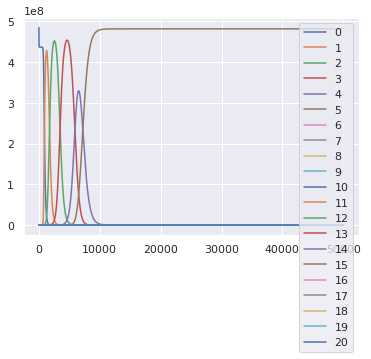

In [210]:
for i,l in zip(m, numpy.arange(threshold+1)):
    plt.plot(i, label=l)
plt.legend()

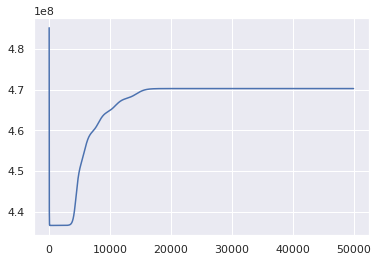

In [193]:
plt.plot(m.sum(axis=0))

## Weird dynamics between mutant populations
- For the usual range of g and slightly larger lifespans, the populations begin to cycle and seem to reach stable oscillations with little convergence. 